In [1]:
import os
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [2]:
DATAPATH = "data"
data = []

print(os.listdir(DATAPATH))

['INL_ideal_SW_ideal_CDAC.csv', 'sine_4.4725M_mismatch_1.csv', 'spectrum_4.91M_4096.csv', 'sine_4.4725M_2048.csv', 'spectrum_12.49M_4096.csv', 'INL_TG_ideal_CDAC.csv', 'out (1).csv', 'spectrum_4.47M_4096.csv', 'INL_mismatch_3_noisy.csv', 'spectrum_4.47M_4096_conservative.csv', 'spectrum_6.01M_4096_conservative.csv', 'spectrum_9.47M_4096_conservative.csv', 'sine_2.33M_2048.csv', 'spectrum_17.47M_4096_conservative.csv', 'spectrum_2.31M_4096.csv', 'test.csv', 'INL_enhanced_TG_ideal_CDAC.csv', 'sine_2.33M_512.csv', 'spectrum_27.53M_4096_conservative.csv', 'sine_0.31M_mismatch_1.csv', 'spectrum_6.01M_4096.csv', 'spectrum_3.31M_4096.csv', 'spectrum_8.53M_4096.csv', 'spectrum_0.31M_4096_conservative.csv', 'INL_pismatch_1_noisy_unbalance.csv', 'sine_4.4725M_2048_liberal.csv', 'spectrum_1.31M_4096.csv', 'histogram.csv', 'INL_mismatch_1_noisy.csv', 'spectrum_0.31M_4096.csv', 'spectrum_3.81M_4096.csv', 'sine_0.2303M_mismatch_1.csv', 'spectrum_12.97M_4096_conservative.csv']


In [3]:
file_name = "histogram.csv"

with open(os.path.join(DATAPATH, file_name)) as f:
    data = f.readlines()

In [5]:
processed_data = np.zeros(shape=(len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",")
    processed_data[i - 1, 0] = float(temp[0])
    processed_data[i - 1, 1] = Bits(bin=temp[1]).int

In [16]:
appended_data = []

for i in range(len(processed_data) - 1):
    appended_data.append(processed_data)
    
    if (processed_data[i, 0] + 0.11e-6) < processed_data[i + 1, 0]:
        appended_data.append([processed_data[i, 0] + 1e-6, processed_data[i, 1]])

In [17]:
print(processed_data[:10])

[[ 9.50e-08  1.10e+02]
 [ 1.95e-07  4.00e+00]
 [ 2.95e-07 -1.14e+02]
 [ 3.95e-07  1.08e+02]
 [ 4.95e-07  8.00e+00]
 [ 5.95e-07 -1.16e+02]
 [ 6.95e-07  1.06e+02]
 [ 7.95e-07  1.10e+01]
 [ 8.95e-07 -1.17e+02]
 [ 9.95e-07  1.04e+02]]


In [18]:
print(len(processed_data))
print(len(appended_data))

19972
21044


In [22]:
histogram = np.histogram(processed_data[:,1], bins=range(-128, 128))

In [23]:
print(histogram)

(array([1073,  264,  220,  212,  179,  144,  143,  123,  141,  121,  120,
        113,  116,  112,   89,  124,  106,   87,   89,   92,   98,   85,
         88,   74,   88,   77,   78,   79,   82,   65,   75,   86,   92,
         63,   69,   68,   72,   74,   61,   69,   67,   67,   63,   66,
         65,   69,   51,   83,   66,   53,   63,   66,   56,   59,   63,
         58,   58,   58,   68,   46,   67,   52,   50,   65,   60,   50,
         64,   52,   49,   58,   48,   50,   58,   46,   55,   62,   49,
         57,   52,   54,   64,   50,   46,   53,   55,   48,   49,   57,
         48,   45,   62,   49,   43,   55,   49,   56,   60,   51,   49,
         47,   59,   46,   41,   53,   51,   41,   57,   54,   41,   51,
         52,   60,   50,   54,   47,   45,   56,   50,   41,   45,   61,
         44,   45,   55,   51,   41,   41,   66,   53,   53,   54,   45,
         46,   56,   47,   42,   53,   47,   45,   56,   52,   50,   39,
         68,   56,   42,   44,   63,   40,   51,  

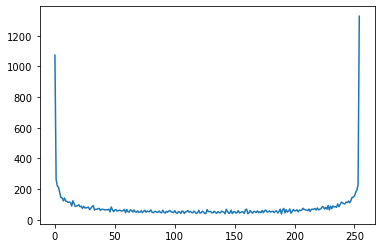

In [25]:
plt.plot(histogram[0])
plt.show()

252


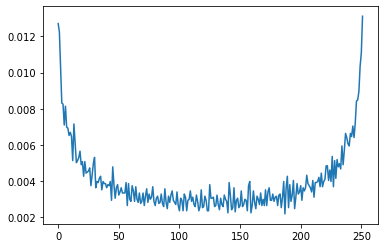

In [56]:
measured_histogram = np.array(histogram[0])
measured = measured_histogram[2:-1] / np.sum(measured_histogram[2:-1])

print(len(measured))
plt.plot(measured)
plt.show()

252


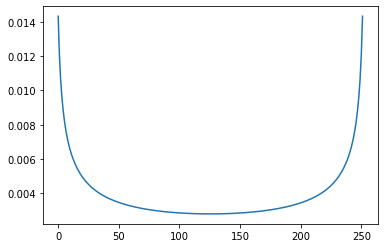

In [63]:
ideal_histogram = np.zeros(256)

for i in range(0, 256):
    ideal_histogram[i] = (1/np.pi) * (
        np.arcsin((2*i - 2**8 - 1 + 3)/(2 ** 8) / 1)
        -  np.arcsin((2*i - 2**8 - 3 + 3)/(2 ** 8) / 1)
    )
#plt.plot(ideal_histogram)
#print(ideal_histogram)
ideal = ideal_histogram[2:-2] / np.sum(ideal_histogram[2:-2])

print(len(ideal))
#print(ideal)
plt.plot(ideal)
plt.show()

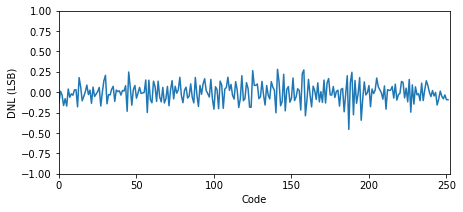

In [73]:
difference = (measured - ideal) / measured
plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.ylim(-1,1)
plt.xlabel("Code")
plt.ylabel("DNL (LSB)")
plt.xlim(0,252)
plt.ylim(-1, 1)
plt.plot(difference)
plt.show()